# **Problem Statement & importing dataset**

## **YULU Background**

> Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

> Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!











## **Buisness Goal of case study**:

> Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

So Basically YULU wants to know:


*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands



## **Concept Used:**

Concepts Used as:

1.   Bi-variate Analysis
2.   2-sample t-test:testing for difference across populations.
3.   ANNOVA TEST
4.   Chi-Squared Test





## **Importing Data set**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import poisson, binom
from scipy.stats import pearsonr,spearmanr
import datetime
from scipy.stats import shapiro, kstest
from scipy.stats import chi2_contingency

# **Basic Data exploration**

## **Basic Info about dataset:**

In [ ]:
df= pd.read_csv('/content/bike_sharing.csv?1642089089')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB



>  **There is total integer data type column is 8.
 and object type is 1, float is 3. so total 12 column and 10886 entries.**



In [ ]:
df.isna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no null value available in data set and so data set is considerable to be very clean.

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## **Column Profiling:**

**Column Profiling:**
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    * 1: Clear, Few clouds, partly cloudy, partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

## **Data Type conversion** & **Univariate Analysis**




In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])
df['season']= df['season'].map(str)
df['holiday']= df['holiday'].map(str)
df['workingday']= df['workingday'].map(str)
df['weather']= df['weather'].map(str)

In [ ]:
# Data Mapping

season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
df["season"] = df["season"].map(lambda x: season_mapping[x])

holiday_mapping = {'0':'no', '1':'yes'}
df["holiday"] = df["holiday"].map(lambda x: holiday_mapping[x])

working_day_mapping = {'0':'no', '1':'yes'}
df["workingday"] = df["workingday"].map(lambda x: working_day_mapping[x])

weather_mapping = {'1':'clear', '2':'partly_clear', '3':'rain', '4':'intense'}
df["weather"] = df["weather"].map(lambda x: weather_mapping[x])

In [ ]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,no,no,clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,no,no,clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,no,no,clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,no,no,clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,no,no,clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,no,yes,clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,no,yes,clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,no,yes,clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,no,yes,clear,13.94,17.425,61,6.0032,12,117,129


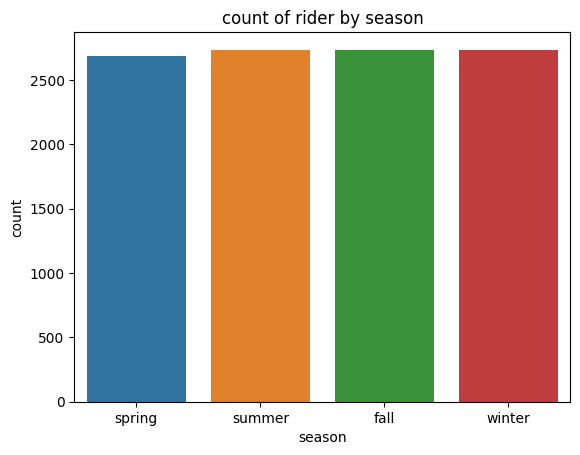

In [ ]:
figsize = (14,8)
sns.countplot(x = "season", data = df,hue="season")
plt.title("count of rider by season")
plt.show()

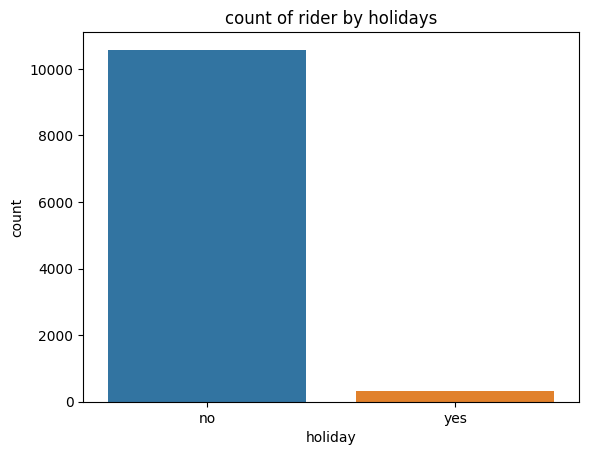

In [ ]:
figsize = (14,8)
sns.countplot(x = "holiday", data = df, hue="holiday")
plt.title("count of rider by holidays")
plt.show()


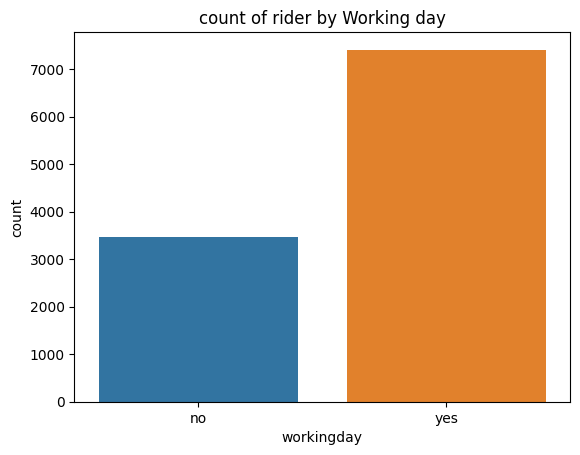

In [ ]:
figsize = (14,8)
sns.countplot(x = "workingday", data = df, hue="workingday")
plt.title("count of rider by Working day")
plt.show()

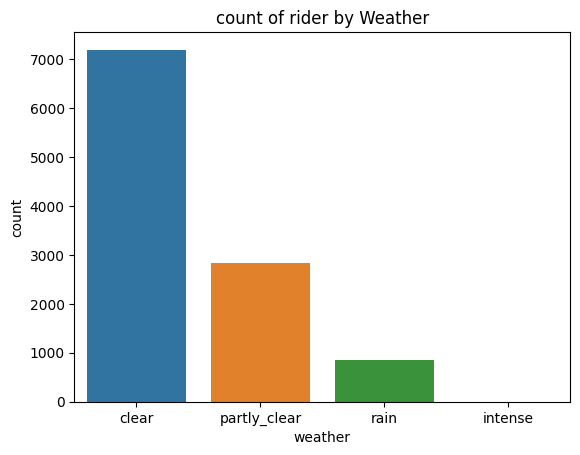

In [ ]:
figsize = (14,8)
sns.countplot(x = "weather", data = df,hue='weather')
plt.title("count of rider by Weather")
plt.show()

## **Univariate Analysis for categorial factors:**
 Showing count of riders by all 4 features in one countour plot for better undesrstanding.

 As see in the contour plot below following insights can drawn out of that:


*   Season counter plot implicate as no of riders are almost same
*   No of rides in holidays are minimals only.
*   More no of riders ride on working days.
*   Most of the riders ride on clear weather only.  



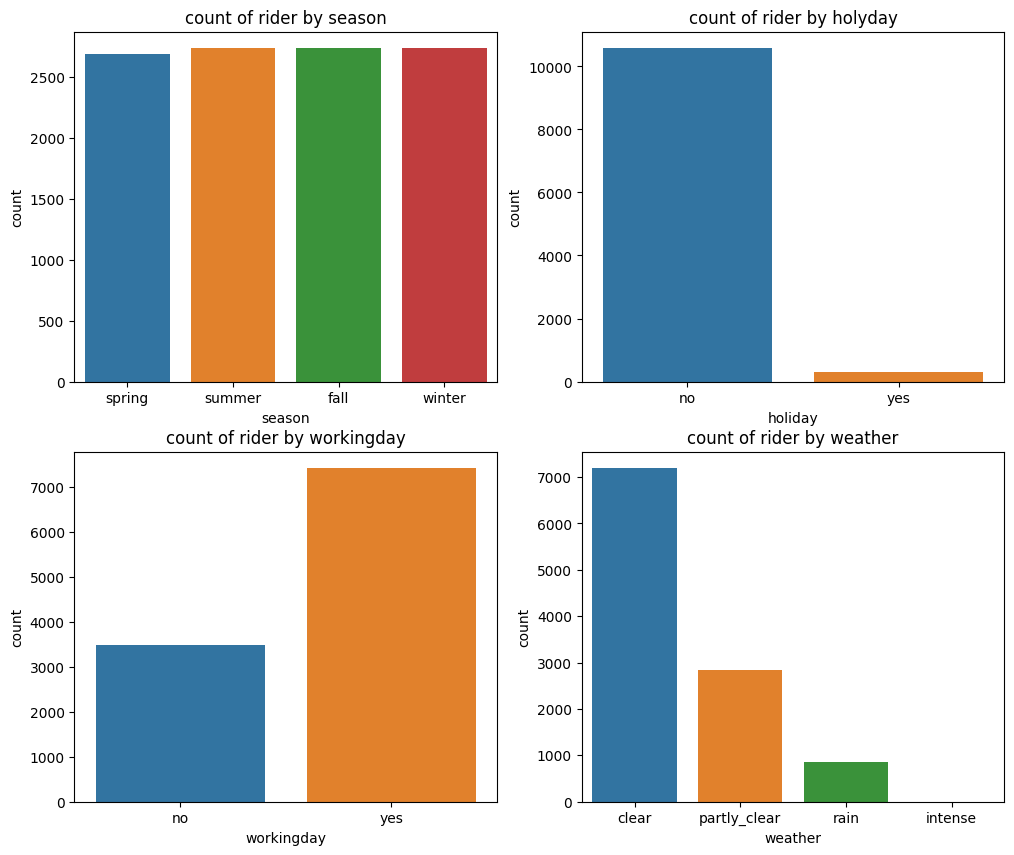

In [ ]:
#Univariate Analysis for categorial factors as count of riders by all 4 features in one countour plot for better undesrstanding.
fig, axes = plt.subplots(2,2, figsize = (12,10))
sns.countplot(x = "season", data = df, ax = axes[0,0],hue='season')
axes[0,0].set_title("count of rider by season")
sns.countplot(x = "holiday", data = df, ax = axes[0,1],hue='holiday')
axes[0,1].set_title("count of rider by holyday")
sns.countplot(x = "workingday", data = df, ax = axes[1,0],hue='workingday')
axes[1,0].set_title("count of rider by workingday")
sns.countplot(x = "weather", data = df, ax = axes[1,1],hue='weather')
axes[1,1].set_title("count of rider by weather")
plt.show()

## **Univariate Analysis for Continous columns**



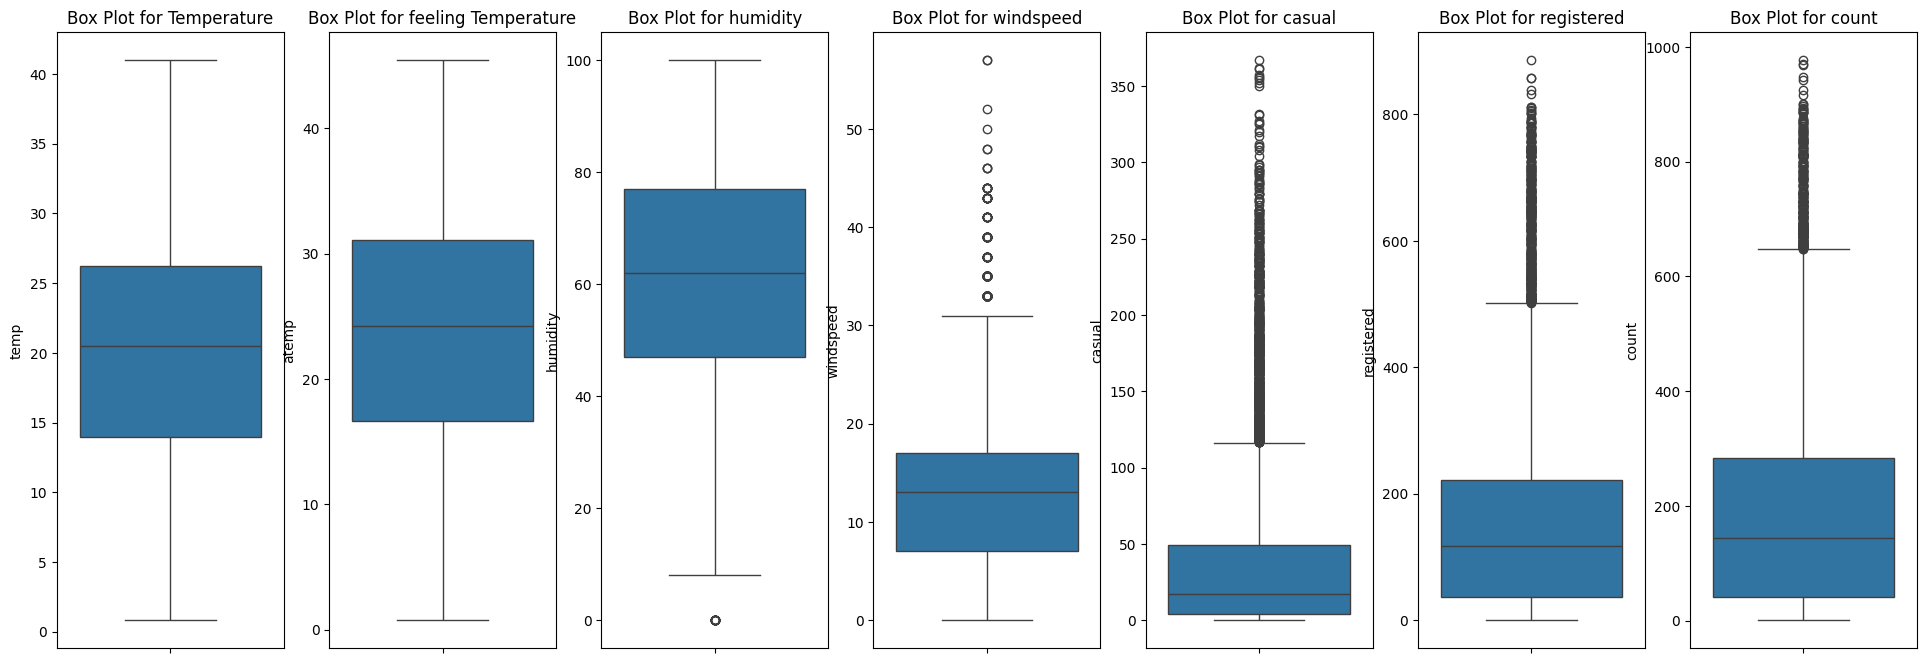

In [ ]:
fig,axes = plt.subplots(1,7,figsize = (24,8))
sns.boxplot(y = "temp", data = df, ax = axes[0])
axes[0].set_title('Box Plot for Temperature')
sns.boxplot(y = "atemp", data = df, ax = axes[1])
axes[1].set_title('Box Plot for feeling Temperature')
sns.boxplot(y = "humidity", data = df, ax = axes[2])
axes[2].set_title('Box Plot for humidity')
sns.boxplot(y = "windspeed", data = df, ax = axes[3])
axes[3].set_title('Box Plot for windspeed')
sns.boxplot(y = "casual", data = df, ax = axes[4])
axes[4].set_title('Box Plot for casual')
sns.boxplot(y = "registered", data = df, ax = axes[5])
axes[5].set_title('Box Plot for registered')
sns.boxplot(y = "count", data = df, ax = axes[6])
axes[6].set_title('Box Plot for count')
plt.show()

 As seen in box plot above following insights can drawn out of that:


*   The mean and median actual temp in the dataset is around 21°C . and for Felling temp is show around 24°C
*   The mean and the median humidity in the dataset is approximately around 62%.
*   The windspeed is approximately around 13, with large number of outliers.
*   There is a large number of outliers for casual, registered and total count of riders between 1st Jan 2011 to 19th Dec 2012. That could be due to the increase in the number of riders over this period.



## **Bivariate Analysis:**

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,no,no,clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,no,no,clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,no,no,clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,no,no,clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,no,no,clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,no,yes,clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,no,yes,clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,no,yes,clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,no,yes,clear,13.94,17.425,61,6.0032,12,117,129


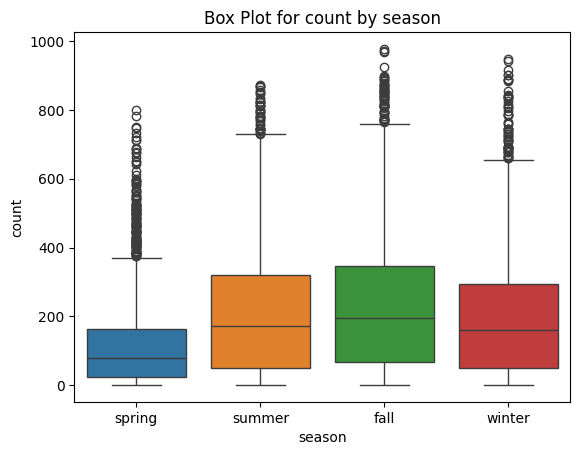

In [ ]:
sns.boxplot(data = df, x = "season", y ="count", hue= "season")
plt.title("Box Plot for count by season")
plt.show()

Below Box plot shows "the weather and bike ride relationship", and from that Following insights can be drawn:

*   the intens weather, Heavy rains is expected to see least bike ride bookings.while clear weather and partly clear have similar medians.

*   The median of Rainy weather Light snow/rain is little lower than the the clear and partly clear weather.

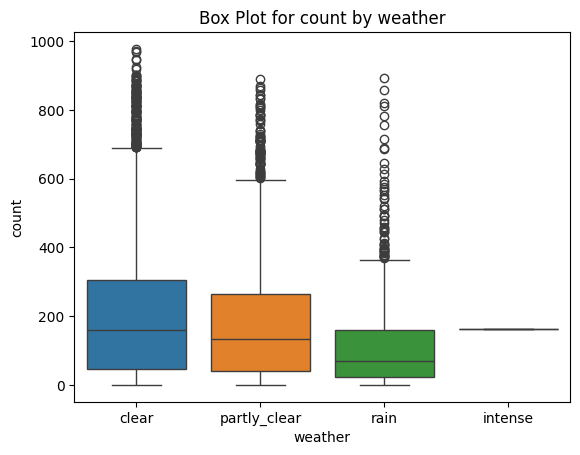

In [ ]:
sns.boxplot(data = df, x = "weather", y ="count", hue= "weather")
plt.title("Box Plot for count by weather")
plt.show()

## **Distribution of Casual, Registered and Total Riders over by Season;Holiday;Workingday & weather**

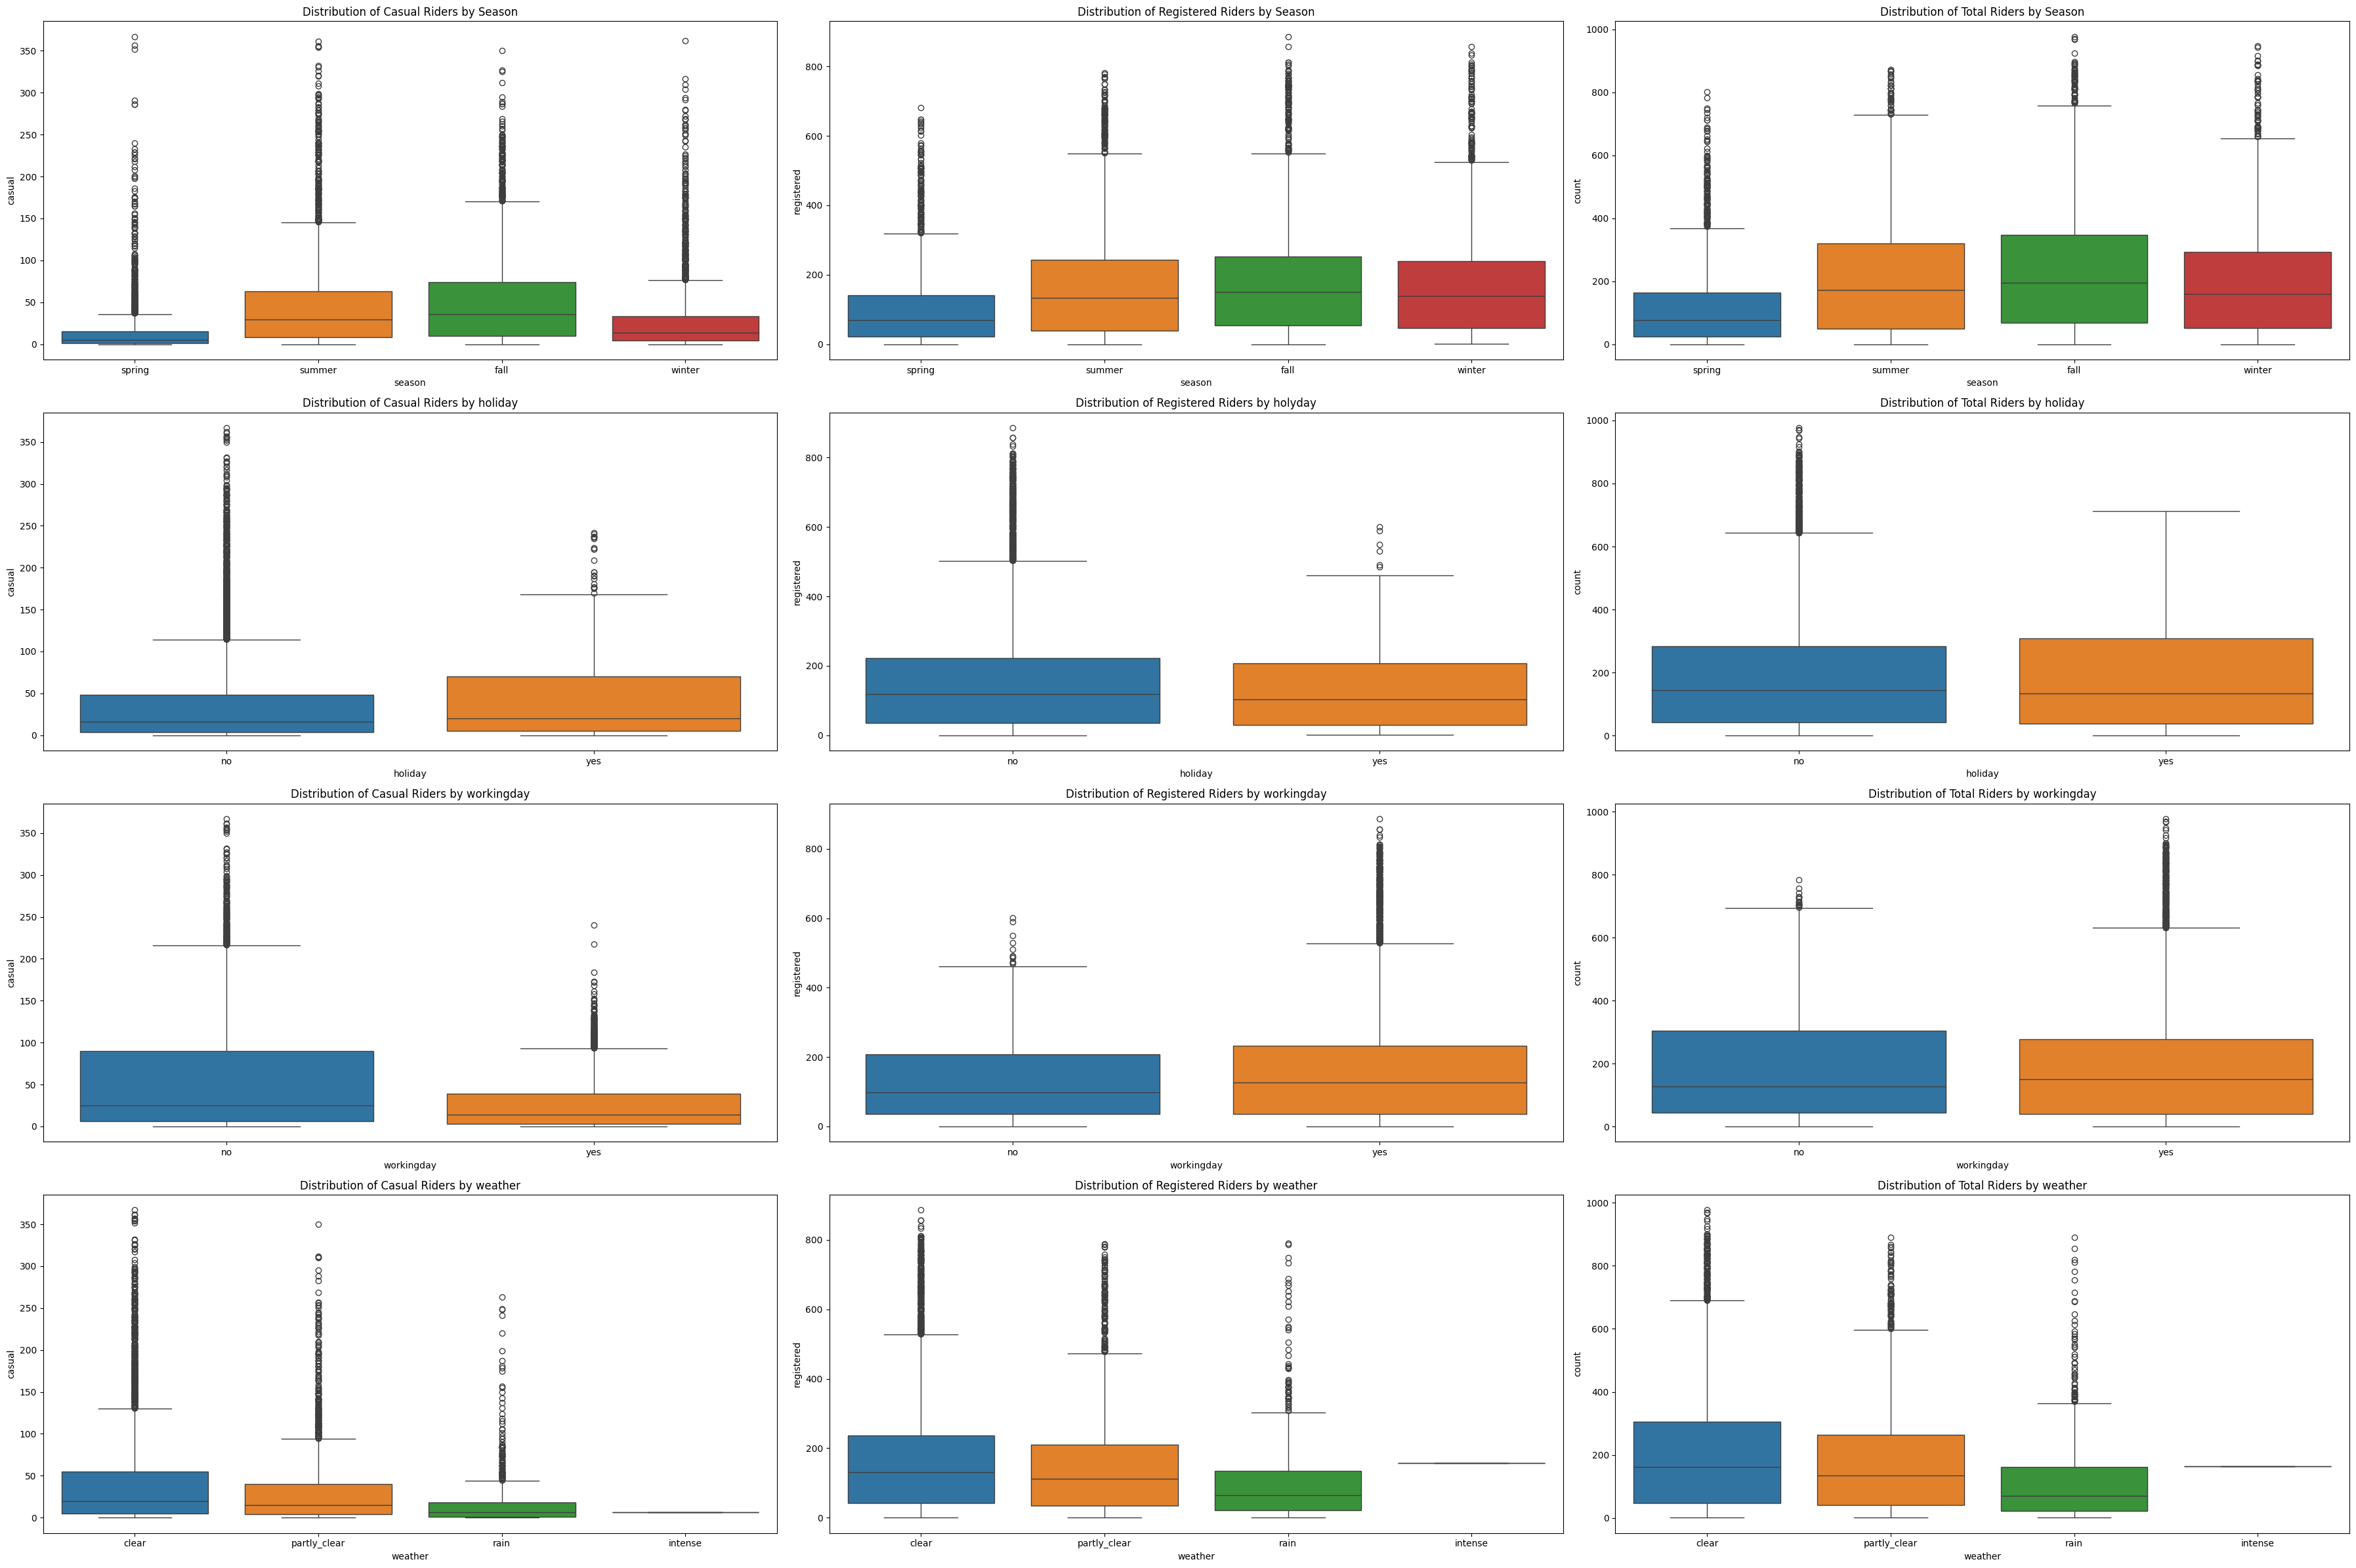

In [ ]:
fig,axes=plt.subplots(4,3,figsize=(36,24))

sns.boxplot(data=df, y="casual", x = 'season', ax=axes[0,0],hue="season")
axes[0,0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=df, y="registered", x = 'season', ax=axes[0,1],hue="season")
axes[0,1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=df, y="count", x = 'season', ax=axes[0,2],hue="season")
axes[0,2].set_title('Distribution of Total Riders by Season')



sns.boxplot(data=df, y="casual", x = 'holiday', ax=axes[1,0],hue="holiday")
axes[1,0].set_title('Distribution of Casual Riders by holiday')

sns.boxplot(data=df, y="registered", x = 'holiday', ax=axes[1,1],hue="holiday")
axes[1,1].set_title('Distribution of Registered Riders by holyday')

sns.boxplot(data=df, y="count", x = 'holiday', ax=axes[1,2],hue="holiday")
axes[1,2].set_title('Distribution of Total Riders by holiday')



sns.boxplot(data=df, y="casual", x = 'workingday', ax=axes[2,0],hue="workingday")
axes[2,0].set_title('Distribution of Casual Riders by workingday')

sns.boxplot(data=df, y="registered", x = 'workingday', ax=axes[2,1],hue="workingday")
axes[2,1].set_title('Distribution of Registered Riders by workingday')

sns.boxplot(data=df, y="count", x = 'workingday', ax=axes[2,2],hue="workingday")
axes[2,2].set_title('Distribution of Total Riders by workingday')



sns.boxplot(data=df, y="casual", x = 'weather', ax=axes[3,0],hue="weather")
axes[3,0].set_title('Distribution of Casual Riders by weather')

sns.boxplot(data=df, y="registered", x = 'weather', ax=axes[3,1],hue="weather")
axes[3,1].set_title('Distribution of Registered Riders by weather')

sns.boxplot(data=df, y="count", x = 'weather', ax=axes[3,2],hue="weather")
axes[3,2].set_title('Distribution of Total Riders by weather')
# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


**The Following insights can be drawn from above BoxPlot:**


*   The median number of casual, registered and total riders is  
highest in fall and summer season followed by winter and spring season.

*   The median number of casual, registered and total riders is almost equal irrespective of whether it is a holidayor not.
*   The median number of casual, registered and total riders is almost equal irrespective of whether it is a workingday or not.


*   The median number of casual, registered and total riders is highest when the weather is clear, followed by the number of casual, registered and total riders when the weather is partly_clear



# **HYPOTHESIS TESTING:**

>**2 Sample T-Test**
 For 2 sample T-test, here we are considering the effect of 2 cases on Rides booking.


1.   Working Days effect over rides Booking,
2.   Holiday effect over rides Booking.

**Case 1: Working Day Effect**



*   Ho : Working day has no effect on the number of electric cycles rented,

*   Ha: Working day has an effect on the number of electric cycles rented,

*   Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)






In [ ]:
#Test_statistic : Mean of count of bicycles rented
df_working_day = df[df["workingday"] == "yes"]
mean_working_day = df_working_day["count"].mean()

df_non_working_day = df[df["workingday"] == "no"]
mean_non_working_day = df_non_working_day["count"].mean()

print("Mean of Working day :", mean_working_day)
print("Mean of Non Working day :", mean_non_working_day)

Mean of Working day : 193.01187263896384
Mean of Non Working day : 188.50662061024755


Right Tailed test : Mean of working day greater than mean of non working day is tested

In [ ]:
t_stat, p_val = ttest_ind(df_working_day["count"], df_non_working_day["count"], alternative = "greater")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

1.2096277376026694 0.11322402113180674
Fail to Reject Null Hypothesis


**Result of T-test on Working day data - The slight difference in mean is not significant to reject the Null Hypothesis.**

So, we Fail to Reject H0 and believe that the rides on working day and non working day are similar

**Case 2: Holidays Effect**



*   Ho : Holidays has no effect on the number of electric cycles rented,

*   Ha: Holidays has an effect on the number of electric cycles rented,

*   Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

In [ ]:
df_holiday = df[df["holiday"] == "yes"]
mean_holiday = df_holiday["count"].mean()

df_non_holiday = df[df["holiday"] == "no"]
mean_non_holiday = df_non_holiday["count"].mean()

print("Mean of Holiday :", mean_holiday)
print("Mean of Non Holiday :", mean_non_holiday)

Mean of Holiday : 185.87781350482314
Mean of Non Holiday : 191.7416548463357


In [ ]:
t_stat, p_val = ttest_ind(df_holiday["count"], df_non_holiday["count"], alternative = "greater")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

-0.5626388963477119 0.7131538058364448
Fail to Reject Null Hypothesis


**Result of T-test on Holidays data - The slight difference in mean is not significant to reject the Null Hypothesis.**

So, we Fail to Reject H0 and believe that the rides on holiday and non holiday are similar

# **ANOVA**

 Performing ANOVA test to check if No. of cycles rented is similar or different in

*   Case1: Different Weather
*   Case2: Different Season


**Case 1: Weather Effect**



*   Ho : Weather has no effect on the number of electric cycles rented,

*   Ha: Weather has an effect on the number of electric cycles rented,

*   Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

In [ ]:
weather_clear = df[df["weather"] == "clear"]["count"].mean()
weather_partly_clear = df[df["weather"] == "partly_clear"]["count"].mean()
weather_rain = df[df["weather"] == "rain"]["count"].mean()
weather_intense = df[df["weather"] == "intense"]["count"].mean()

print("Mean of weather_clear :", weather_clear)
print("Mean of weather_partly_clear :", weather_partly_clear)
print("Mean of weather_rain :", weather_rain)
print("Mean of weather_intense :", weather_intense)

Mean of weather_clear : 205.23679087875416
Mean of weather_partly_clear : 178.95553987297106
Mean of weather_rain : 118.84633294528521
Mean of weather_intense : 164.0


In [ ]:
weather_clear = df[df["weather"] == "clear"]["count"]
weather_partly_clear = df[df["weather"] == "partly_clear"]["count"]
weather_rain = df[df["weather"] == "rain"]["count"]
weather_intense = df[df["weather"] == "intense"]["count"]

In [ ]:
test_stat, p_value = f_oneway(weather_clear,weather_partly_clear,weather_rain,weather_intense)
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("fail to reject the null hypothesis")

65.53024112793271
5.482069475935669e-42
reject the null hypothesis


As we can see above, the p value is extremely less than significance value - (alpha - 0.05). So, we Reject the Null Hypothesis which said that the mean of all weathers is same.

We can strongly say that Weather has a extreme effect on number of bicycles rented

**Case 1: Seasons Effect**



*   Ho : Seasons has no effect on the number of electric cycles rented,

*   Ha: Seasons has an effect on the number of electric cycles rented,

*   Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

In [ ]:
season_spring = df[df["season"] == "spring"]["count"].mean()
season_summer = df[df["season"] == "summer"]["count"].mean()
season_fall = df[df["season"] == "fall"]["count"].mean()
season_winter = df[df["season"] == "winter"]["count"].mean()
print("Mean of season_spring :", season_spring)
print("Mean of season_summer :", season_summer)
print("Mean of season_fall :", season_fall)
print("Mean of season_winter :", season_winter)

Mean of season_spring : 116.34326135517499
Mean of season_summer : 215.25137211855105
Mean of season_fall : 234.417124039517
Mean of season_winter : 198.98829553767374


In [ ]:
season_spring = df[df["season"] == "spring"]["count"]
season_summer = df[df["season"] == "summer"]["count"]
season_fall = df[df["season"] == "fall"]["count"]
season_winter = df[df["season"] == "fall"]["count"]

In [ ]:
test_stat,p_value = f_oneway(season_spring,season_summer,season_fall,season_winter)
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject null hypothesis")

264.50193816721185
1.0533628242092138e-165
Reject the null hypothesis


As we can see above, the p value is extremely less than significance value - (alpha - 0.05). So, we Reject the Null Hypothesis which said that the mean of all seasons is same.

We can strongly say that Seasons have an extreme effect on number of bicycles rented.

# **Chi-square test to check if Weather is dependent on the season**


*   Ho : Weather is not dependent on Seasons,

*   Ha: Weather is dependent on Seasons

*   Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

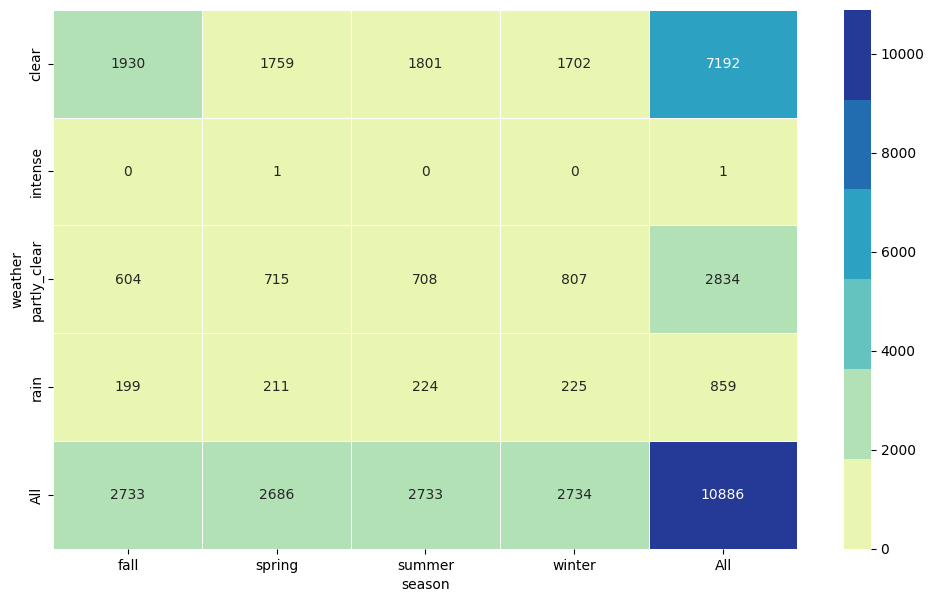

In [ ]:
df1 = pd.crosstab(index = df["weather"], columns = df["season"], margins = True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
sns.heatmap(df1, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

In [ ]:

chi_stat, p_val, dof, expected = chi2_contingency(df1)

print(chi_stat, p_val, dof, expected)

49.15865559689363 3.1185273325126814e-05 16 [[1.80559765e+03 1.77454639e+03 1.80559765e+03 1.80625831e+03
  7.19200000e+03]
 [2.51056403e-01 2.46738931e-01 2.51056403e-01 2.51148264e-01
  1.00000000e+00]
 [7.11493845e+02 6.99258130e+02 7.11493845e+02 7.11754180e+02
  2.83400000e+03]
 [2.15657450e+02 2.11948742e+02 2.15657450e+02 2.15736359e+02
  8.59000000e+02]
 [2.73300000e+03 2.68600000e+03 2.73300000e+03 2.73400000e+03
  1.08860000e+04]]


In [ ]:
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


As  we are Rejecting Null Hypothesis

After applying the chi2_contigency test, we observe that the p value is very less in comparision to alpha(0.05), so we can say that the Weather is dependent on Season.

So, we Reject Null Hypothesis which says Season and Weather is not dependent on each other

# Test of Normality


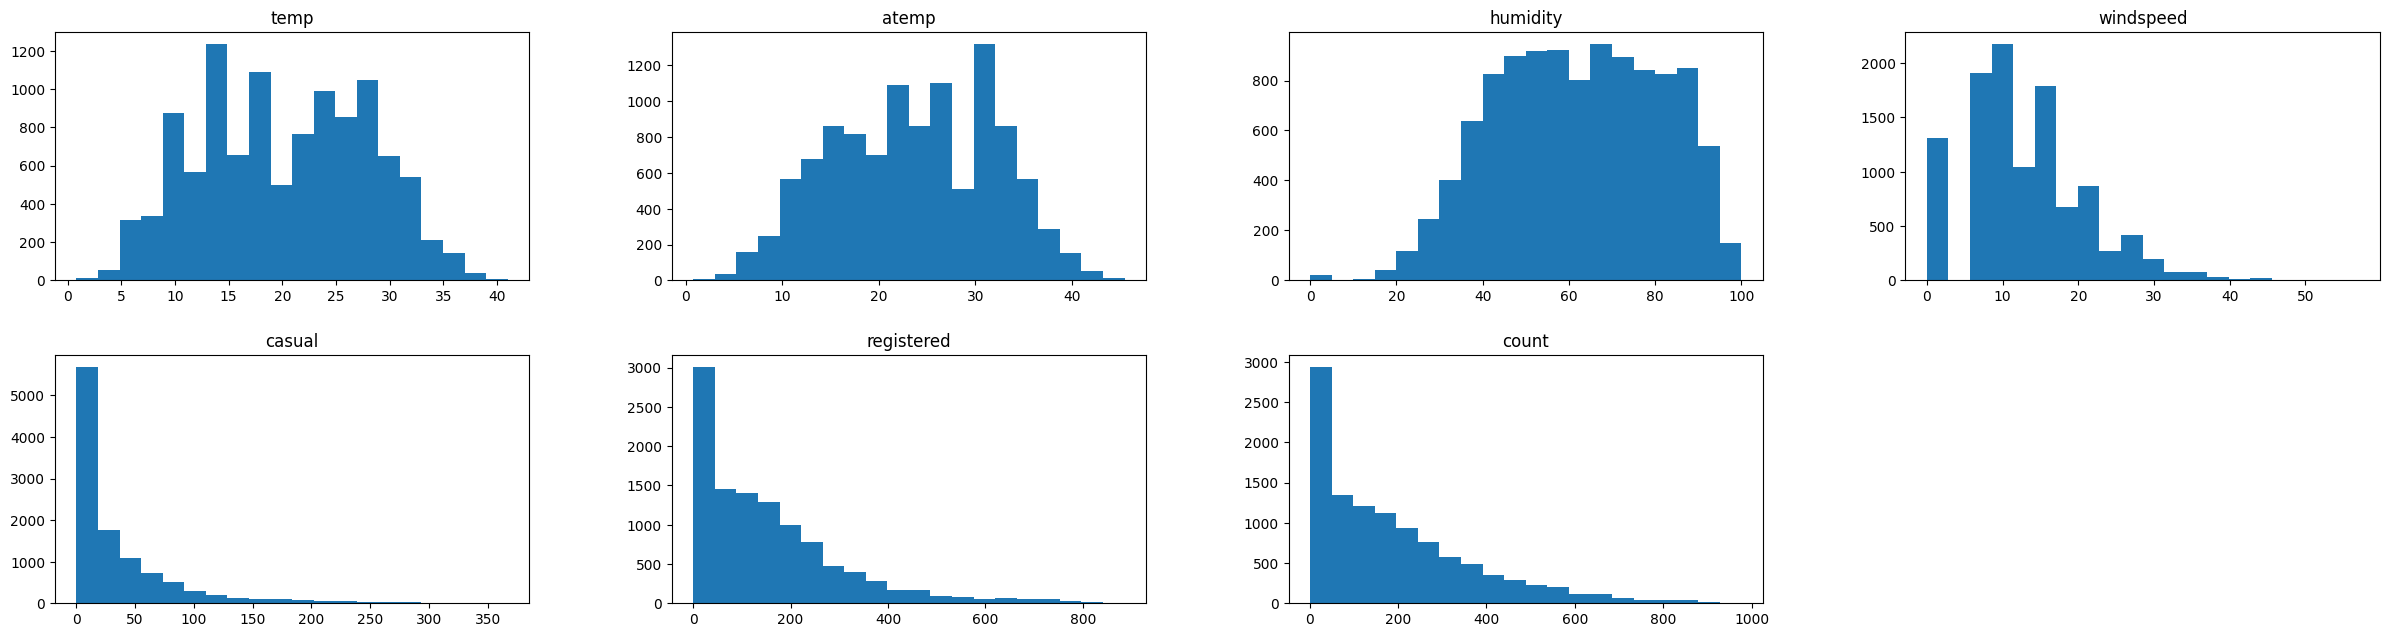

In [ ]:
df_count = df[['temp','atemp','humidity','windspeed','casual','registered','count']]
df_count.hist(layout = (5,4),figsize = (30,20), grid = False, bins = 20)
plt.show()

From above plot the distribution of avobe plot of all variables is skewed and hence not normally distributed

# **Q-Q plot**

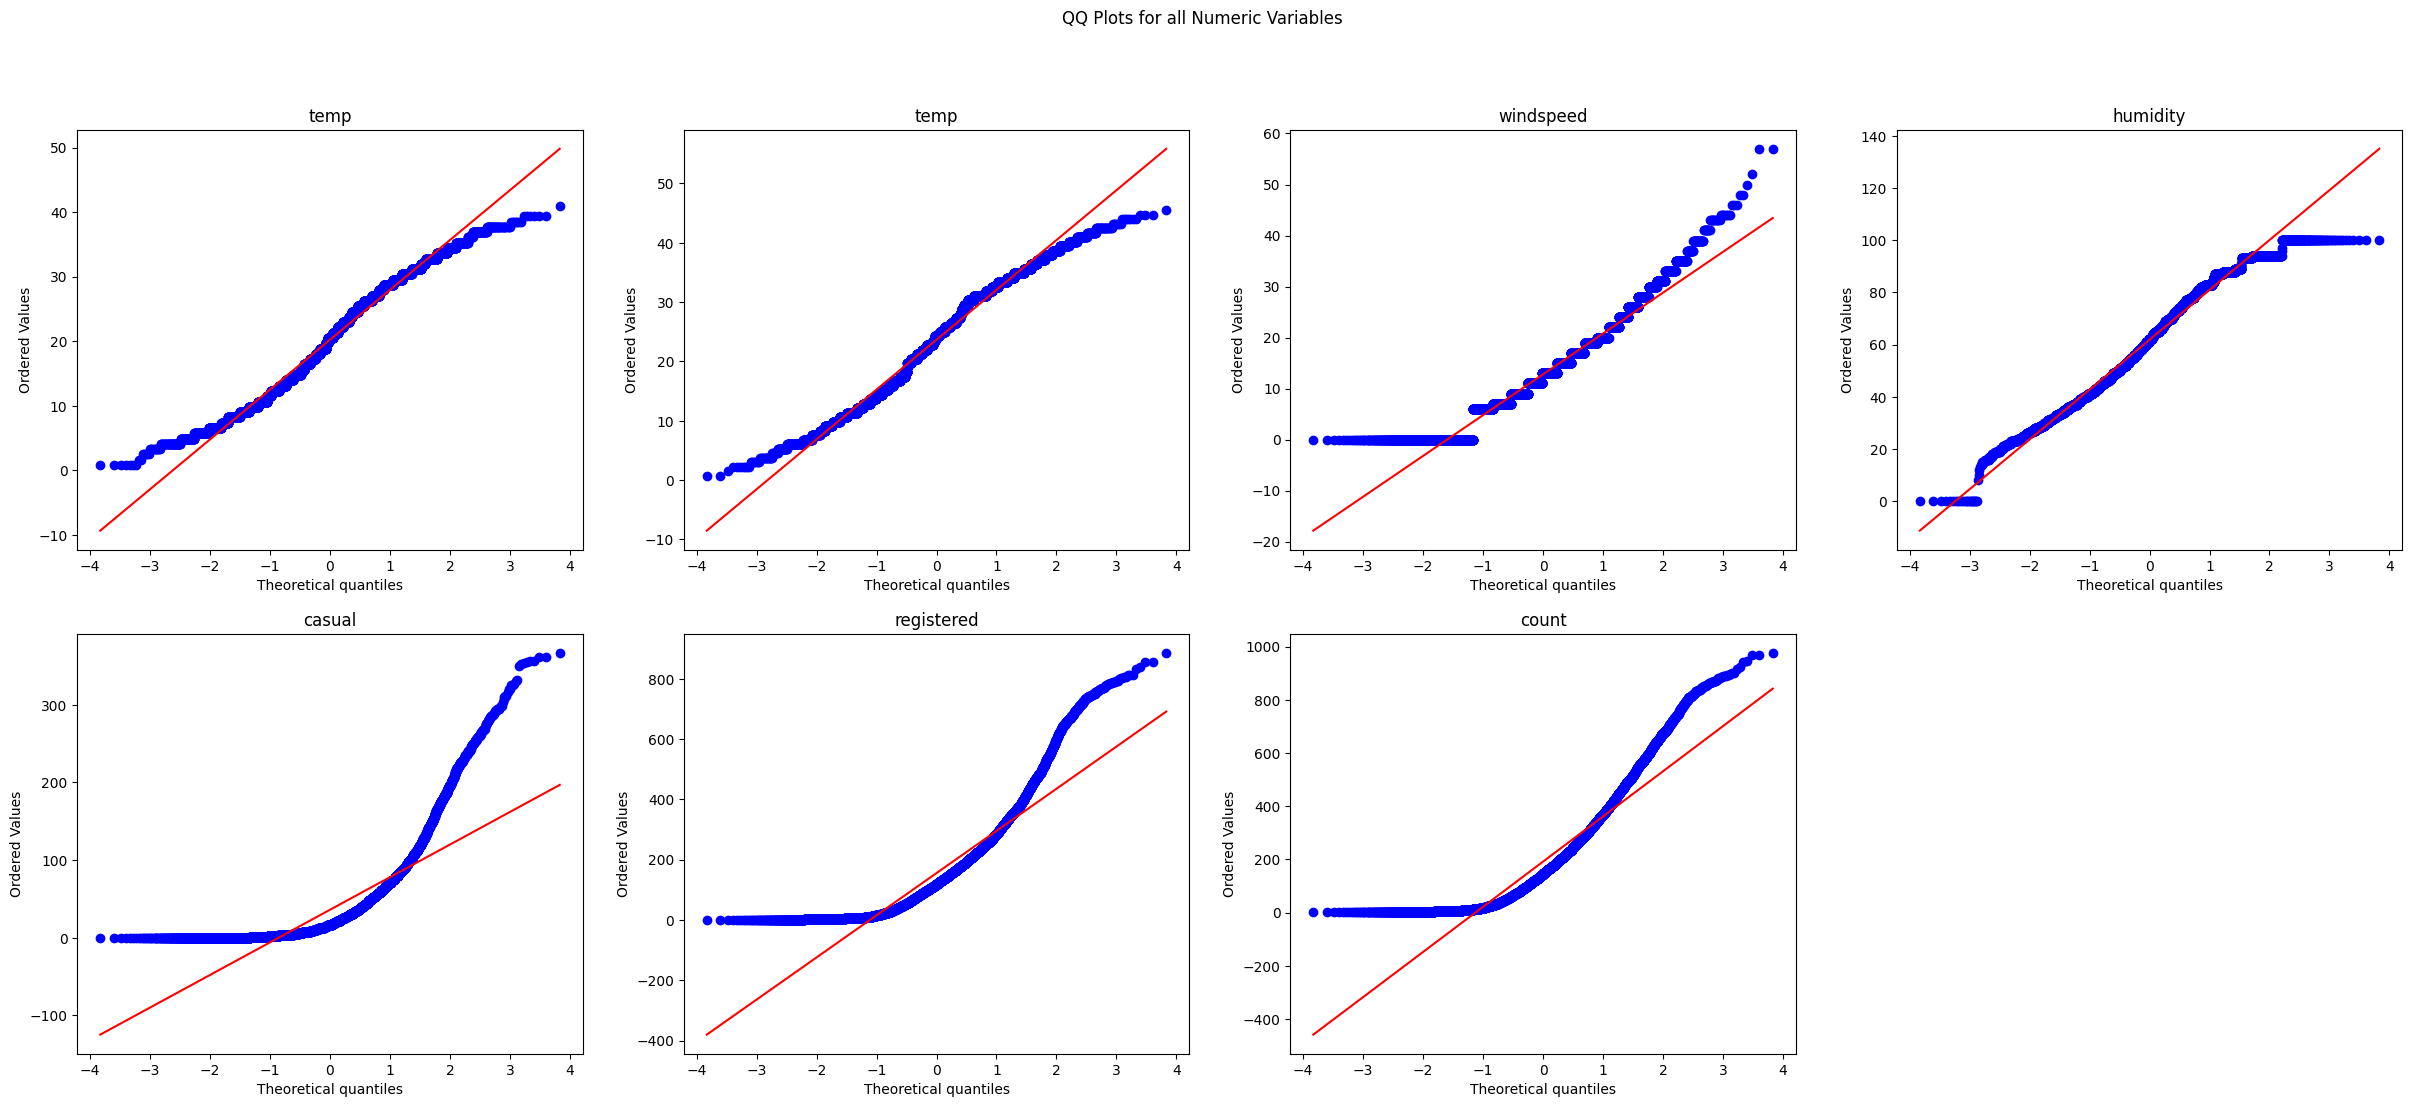

In [ ]:
import pylab
import scipy.stats as stats

plt.figure(figsize=(30,12))

ax1 = plt.subplot(241)
res = stats.probplot(df_count['temp'], dist="norm", plot=plt)
ax1 = plt.title('temp')

ax2 = plt.subplot(242)
res = stats.probplot(df_count['atemp'], dist="norm", plot=plt)
ax2 = plt.title('temp')

ax3 = plt.subplot(243)
res = stats.probplot(df_count['windspeed'], dist="norm", plot=plt)
ax3 = plt.title('windspeed')

ax4 = plt.subplot(244)
res = stats.probplot(df_count['humidity'], dist="norm", plot=plt)
ax4 = plt.title('humidity')

ax5 = plt.subplot(245)
res = stats.probplot(df_count['casual'], dist="norm", plot=plt)
ax5 = plt.title('casual')

ax6 = plt.subplot(246)
res = stats.probplot(df_count['registered'], dist="norm", plot=plt)
ax6 = plt.title('registered')

ax7 = plt.subplot(247)
res = stats.probplot(df_count['count'], dist="norm", plot=plt)
ax7 = plt.title('count')

plt.suptitle('QQ Plots for all Numeric Variables')
plt.show()

From the QQ-Plot we observe that none of the variables is looking straight, hence showing
deviation from normal distribution.

# **Shapiro Test & KS Test**

*   Ho : Data is folowing Gaussian/Normal distribution.

*    Ha : Data is not folowing Gaussian/Normal distribution.

In [ ]:
weather_clear_1 = df[df["weather"] == "clear"]
weather_partly_clear_1 = df[df["weather"] == "partly_clear"]
weather_rain_1 = df[df["weather"] == "rain"]
weather_intense_1 = df[df["weather"] == "intense"]

In [ ]:

weather_clear_subset = weather_clear_1["count"].sample(100)
test_stat, p_val = shapiro(weather_clear_subset)
print(test_stat, p_val)
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.9024707674980164 1.8508757193558267e-06
Reject Null Hypothesis


**KS-TEST**

In [ ]:
test_stat, p_val = kstest(weather_clear_subset, norm.cdf, args=(weather_clear_subset.mean(), weather_clear_subset.std()))

print(test_stat, p_val)
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.13067537759507414 0.05990546490018891
Fail to Reject Null Hypothesis


According to the KS test, Weather data provided is Gaussian.

Conclusion : If one test says that the data is Gaussian then we continue to believe that the data is Gaussian.

In [ ]:
weather_partly_clear_subset = weather_partly_clear_1 ["count"].sample(100)
test_stat, p_val = shapiro(weather_partly_clear_subset)
print(test_stat, p_val)
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.8825835585594177 2.33820301787091e-07
Reject Null Hypothesis


In [ ]:
test_stat, p_val = kstest(weather_partly_clear_subset, norm.cdf, args=(weather_partly_clear_subset.mean(), weather_partly_clear_subset.std()))

print(test_stat, p_val)
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.14197175206080448 0.031988348162696044
Reject Null Hypothesis


After applying Qqplot, Shapiro test and KS test, Weather 2 data still doesn't follow Gaussian

## **Boxcox**


To solve this problem, using Boxcox over the sample data of partly clear weather

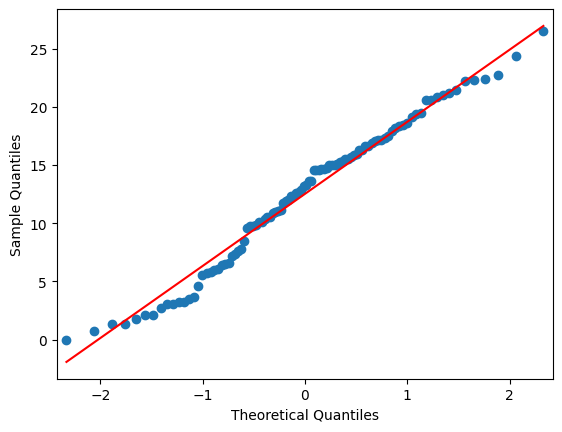

In [ ]:
from scipy.stats import boxcox

transformed_data_weather_2 = boxcox(weather_partly_clear_subset)[0]

qqplot(transformed_data_weather_2, line = "s")
plt.show()

In [ ]:
test_stat, p_val = shapiro(transformed_data_weather_2)

print(test_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.9763702750205994 0.06909169256687164
Fail to Reject Null Hypothesis


In [ ]:
test_stat, p_val = kstest(transformed_data_weather_2, norm.cdf, args=(transformed_data_weather_2.mean(), transformed_data_weather_2.std()))

print(test_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


0.09789591967635802 0.27491805629332694
Fail to Reject Null Hypothesis


Here, the transformed data now follows Gaussian distribution

# **Conclusion of Case study and Insights Drawn from it:**



*   Yulu is facing losses because of lower demand of electric bicycles as seen in the data provided above.

*   The factors analysed above were demand on a working day, holiday, across different seasons, different weather conditions and temparature.

*   As from 2 Sample T-test we have seen that holiday has no impact on the number of riders at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is a holiday or not

*   It is seen that the demand is higher on clear weather days as people tend to enjoy riding bicycles on those days.

*   As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically different at 95% confidence level for different seasons, Yulu should have different strategies for different seasons. Yulu should try to increase the riders in the months of fall and winter when the number of riders goes down considerably and maximize capacity utilization of e-bikes in the months of summer and fall.

*   While it is very difficult for people to ride an electric vehicle during rain, snow, heavy wind, etc. so the demand is very low during that time.

Seasons also have a similar effect like weather.

*   Holiday or working day doesn't have much effect on the rides. People prefer it during both

# **Recommendations:**




1.   As no of Rides are declining during the adverse weather condition YULU should make some Refreshing stalls at Pick up and drop station and in between station.
2.   Yulu can reduce the rate/price when the weather or season is not favourable.
3.   Yulu can provide exiciting offers during office hours on workdays so that people try to use bicycles instead of buses/cars.

4.  On holidays, discounts can be offered for multiple bicycle bookings by one account as usually friends and family groups plan to go out and if discount is offered it might attract them.

5. Yulu should do social media Campaigning to advertise itself as Environment safe company and try to lure people towards environment protection.



